# Cleaning Characters and movie tables

Note: in order to find the wiki page from the wiki id, you have use this link:
https://en.wikipedia.org/?curid= _id_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [3]:
data_folder = '../data/'
pickle_folder = '../data/pickles/'

movies = pd.read_table(data_folder + 'MovieSummaries/movie.metadata.tsv',names=['wiki_id', 'freebase_id', 'name', 'release_date', 'revenue', 'runtime', 'languages', 'countries', 'genres'] , sep='\t')
movies.head(20)

,wiki_id,freebase_id,name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


##  Fixing errors

Hunting season, Release date : 1010-12-02, real date : 2010-12-02

In [3]:
print(f'Old release date: {movies.loc[62836, "release_date"]}')
movies.loc[62836,'release_date']= '2010-12-02'
print(f'New release date: {movies.loc[62836, "release_date"]}')

Old release date: 1010-12-02
New release date: 2010-12-02


These mistakes will be noticed in the future, easier to fix here

In [4]:
movies.loc[movies.wiki_id == 30049059,'release_date'] = '1981-12-25'
movies.loc[movies.wiki_id == 18631737,'release_date'] = '1911-12-01'
movies.loc[movies.wiki_id == 27883510,'release_date'] = '1918-07-14'


In [5]:
movies["release_date"] = pd.to_datetime(movies.release_date)
movies["year"] = [year.year for year in movies["release_date"]]
movies.head()

,wiki_id,freebase_id,name,release_date,revenue,runtime,languages,countries,genres,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988.0
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987.0
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983.0


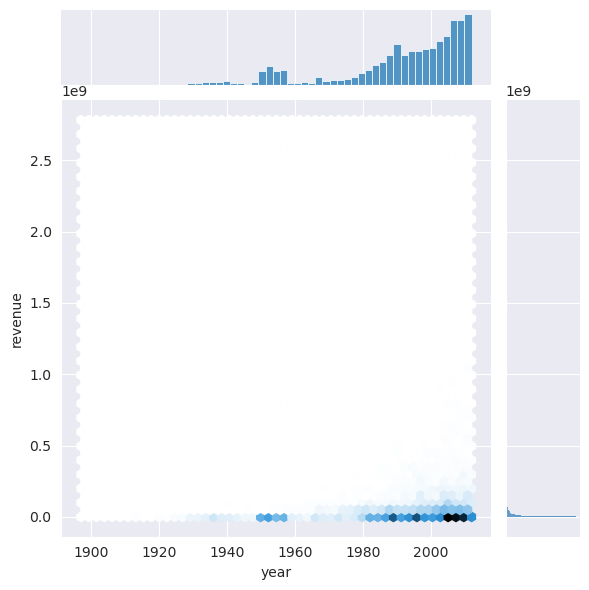

In [6]:
sns.jointplot(x=movies['year'], y=movies['revenue'], kind="hex")

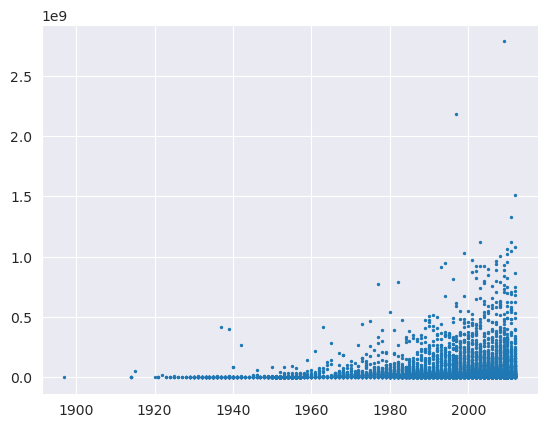

In [7]:
plt.scatter(x=movies['year'], y=movies['revenue'], s=2)

Lets look at outliners

In [8]:
movies.sort_values(by='year', ascending=True).head(5)

,wiki_id,freebase_id,name,release_date,revenue,runtime,languages,countries,genres,year
57963,1082508,/m/044ggd,Roundhay Garden Scene,1888-01-01,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1888.0
38764,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889-01-01,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1889.0
60249,22770416,/m/0gj9h_4,London's Trafalgar Square,1890-01-01,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1890.0
53907,6431996,/m/0g53t3,"Monkeyshines, No. 1",1890-01-01,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1890.0
25984,644824,/m/02_1qn,Dickson Greeting,1891-01-01,NaN,0.05,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/0219x_"": ""Indie""}",1891.0


In [9]:
movies.sort_values(by='revenue', ascending=True).head(5)

,wiki_id,freebase_id,name,release_date,revenue,runtime,languages,countries,genres,year
35178,28223867,/m/07l4_10,"Hugh Hefner: Playboy, Activist and Rebel",2010-07-30,10000.0,135.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/0hj3n07"": ""Culture & Society"", ""/m/017fp""...",2010.0
51695,29085210,/m/0dll0nz,GhettoPhysics,2010-01-01,10200.0,NaN,{},{},"{""/m/0cshrf"": ""Political cinema"", ""/m/0jtdp"": ...",2010.0
53942,33895664,/m/07k983r,Logan,2010-01-01,10474.0,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",2010.0
31550,15904586,/m/03qfnkx,Fighting Tommy Riley,2005-05-06,10514.0,109.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hn10"": ""LGBT"", ""/m/01z02hx"": ""Sports"", ""...",2005.0
56050,20122638,/m/04yft1h,Frankie and Alice,2010-12-10,10670.0,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/017fp"": ""Biography"", ""/m/07s9rl0"": ""Drama""}",2010.0


In [10]:
movies.sort_values(by='revenue', ascending=False).head(10)

,wiki_id,freebase_id,name,release_date,revenue,runtime,languages,countries,genres,year
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2009.0
22256,52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/09c7w0"": ""United States of America""}","{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ...",1997.0
28192,22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",2012.0
30278,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery""...",2011.0
18645,25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",2011.0
80920,174251,/m/017jd9,The Lord of the Rings: The Return of the King,2003-12-17,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",2003.0
54719,29075630,/m/0bpm4yw,The Dark Knight Rises,2012-07-16,1.078009e+09,165.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",2012.0
69586,1213838,/m/04hwbq,Toy Story 3,2010-06-12,1.063172e+09,102.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/03k9fj"": ""Adventure"", ""/m/0hj3myq"": ""Chil...",2010.0
14303,24314116,/m/09v8clw,Pirates of the Caribbean: On Stranger Tides,2011-05-07,1.043872e+09,136.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02qvnvs"": ""Swashbuckler films"", ""/m/03k9f...",2011.0
50039,50793,/m/0ddt_,Star Wars Episode I: The Phantom Menace,1999-05-19,1.027045e+09,136.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",1999.0


In [11]:
characters = pd.read_table(data_folder + 'character.metadata.tsv',names=['movie_wiki_id', 'movie_freebase_id', 'release_date', 'character_name', 'birth', 'gender', 'height', 'ethnicity', 'actor_name', 'actor_age', 'freebase_character_actor_map_id', 'freebase_character_id', 'freebase_actor_id' ] , sep='\t', index_col=False)
characters.head(20)

,movie_wiki_id,movie_freebase_id,release_date,character_name,birth,gender,height,ethnicity,actor_name,actor_age,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m
7,975900,/m/03vyhn,2001-08-24,Big Daddy Mars,NaN,M,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,/m/0bgcht0,/m/0bgcht7
8,975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0
9,975900,/m/03vyhn,2001-08-24,Uno,NaN,M,NaN,NaN,Duane Davis,NaN,/m/0bgchtj,/m/0bgchtm,/m/03nrwdy


Fix the 1010-12-02 release date

In [12]:
index_to_change = [characters.release_date=='1010-12-02']
for index_ in index_to_change:
    characters.loc[index_,'release_date']= '2010-12-02'

The woman born in 1498

In [13]:
characters.loc[11550,'birth'] = np.nan
characters.loc[284566,'birth'] = np.nan

Poor Leland L. Jones, born in 1963-11-28 and not 0019-11-28

In [14]:
characters.loc[characters.birth.str.contains('19-11-28') == True,'birth'] = '1963-11-28'

Poor Dale Gibson, that really does not want us to know its age

In [15]:
characters.loc[42283,'birth'] = np.nan

Actually I notice there are lots of problem with people whose birth is 0019-xx-xx, lets check them

In [16]:
characters.loc[characters.birth.str.contains('0019')==True]

,movie_wiki_id,movie_freebase_id,release_date,character_name,birth,gender,height,ethnicity,actor_name,actor_age,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id
45080,2244529,/m/06yt3z,2003,NaN,0019-03-22,F,NaN,NaN,Julie Stevens,-16.0,/m/0bff0wc,NaN,/m/06p14x
163428,5051761,/m/0d0l79,2006,NaN,0019-02-22,F,NaN,NaN,Dagney Kerr,-13.0,/m/0gc0gl6,NaN,/m/0fjlyh
246642,5313889,/m/0df13_,2007,NaN,0019-11-26,M,1.8,NaN,Dwayne L. Barnes,-12.0,/m/0gckdwz,NaN,/m/0gc91mg


For example Julie Stevens, that does not want us to know her age 🚮

In [17]:
characters.loc[45080,'birth'] = np.nan

But Dagney Kerr is born the 1972-02-22 and not 0019-02-72, lets fix that

In [18]:
characters.loc[163428, 'birth'] = '1972-02-22'

Same for good ol' Dwayne L. Barnes, born the 1970-11-26 and not the 0019-11-26

In [19]:
characters.loc[246642, 'birth'] = '1970-11-26'

Holly Eglington, known for her incredible roles in Kill Switch, Rise of the Damned, Postal and Edison is born the 1975-08-26 and not the 1075-08-19.

In [20]:
characters.loc[characters.birth.str.contains('1075')==True,'birth'] = '1975-08-19'

I couldnt find any information on Qian Liu, 0852-03-10

In [21]:
characters.loc[107166,'birth'] = np.nan

Monica Dionne, born 1967-02-07 and not 0195-02-07

In [22]:
characters.loc[characters.birth == '0195-02-07','birth'] = '1967-02-07'

Couldnt find any info on Lu Xun

In [23]:
characters.loc[characters.birth == '0183', 'birth'] = np.nan

Matthieu van Eysden, born in 1896-04-26

In [24]:
characters.loc[characters.birth == '2896-04-26','birth'] = '1896-04-26'

Lil' Kim is born 1974-07-11, not 9900-09-07

In [25]:
characters.loc[characters.birth == '9900-09-07', 'birth'] = '1974-07-11'

Juan Diego Cuauhtlatoatzin is a saint born in 1474. But Juan Diego was the one that played in Fantasia... 3. Born the 1942-12-14

In [26]:
characters.loc[characters.birth == '1474-07-12', 'actor_name'] = 'Juan Diego'
characters.loc[characters.birth == '1474-07-12', 'birth'] = '1942-12-14'

1936, not 2936 for poor JJMcColl

In [27]:
characters.loc[characters.birth == '2936-12-24','birth'] = '1936-12-24'

We dont know robert strange's age

In [28]:
characters.loc[260125,'birth'] = np.nan

Steve Clark's age is unknown 285052

In [29]:
characters.loc[285052,'birth'] = np.nan

Some other guys we dont know their age

In [30]:
characters.loc[197396,'birth'] = np.nan
characters.loc[5651515,'birth'] = np.nan
characters.loc[230088,'birth'] = np.nan
characters.loc[247089,'birth'] = np.nan
characters.loc[305915,'birth'] = np.nan

mistake that will be noticed in the future :

In [31]:
characters.loc[characters.movie_wiki_id == 30049059,'release_date'] = '1981-12-25'
characters.loc[characters.movie_wiki_id == 30049059,'release_date'] = '1981-12-25'
characters.loc[characters.movie_wiki_id == 18631737,'release_date'] = '1911-12-01'
characters.loc[characters.movie_wiki_id == 27883510,'release_date'] = '1918-07-14'

Lets transform all of this in datetime64

In [32]:
characters["release_date"] = pd.to_datetime(characters.release_date)
characters["birth"] = pd.to_datetime(characters.birth,utc=True)

characters["release_year"] = [year.year for year in characters["release_date"]]
characters["birth_year"] = [year.year for year in characters["birth"]]

characters.dtypes

movie_wiki_id                                  float64
movie_freebase_id                               object
release_date                            datetime64[ns]
character_name                                  object
birth                              datetime64[ns, UTC]
gender                                          object
height                                         float64
ethnicity                                       object
actor_name                                      object
actor_age                                      float64
freebase_character_actor_map_id                 object
freebase_character_id                           object
freebase_actor_id                               object
release_year                                   float64
birth_year                                     float64
dtype: object

<AxesSubplot:xlabel='release_year', ylabel='birth_year'>

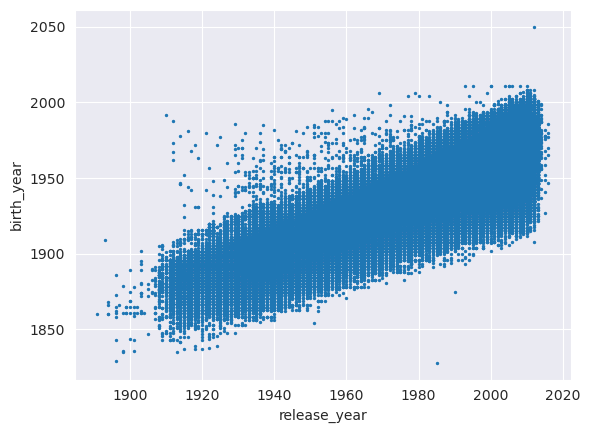

In [33]:
characters.plot.scatter(x='release_year', y='birth_year', s=2)

Okay, some people seem to be born in 1950 but played in 1920 movies. gotta check those out.
Side note: lmao the 1st one is frank dubosc, in a movie released in 1934.
There are 405 characters whose actors have a negative age. What should we do ?

In [34]:
characters.loc[characters.birth_year > characters.release_year]

,movie_wiki_id,movie_freebase_id,release_date,character_name,birth,gender,height,ethnicity,actor_name,actor_age,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id,release_year,birth_year
767,15007384.0,/m/03h4h5p,1934-05-02,NaN,1963-11-07 00:00:00+00:00,NaN,NaN,NaN,Franck Dubosc,-29.0,/m/0bwb9k3,NaN,/m/01wlly9,1934.0,1963.0
2286,2553539.0,/m/07mlsy,1918-04-14,NaN,1931-03-25 00:00:00+00:00,M,NaN,NaN,Tom Wilson,-12.0,/m/0jsqm1,NaN,/m/0382zh,1918.0,1931.0
3892,5917218.0,/m/0fdf3y,1965-01-01,NaN,1983-03-03 00:00:00+00:00,F,1.75,NaN,Kim Smith,-18.0,/m/04mb5kf,NaN,/m/03pjkv,1965.0,1983.0
6666,73930.0,/m/0jsjm,1924-01-01,Robert,1972-11-07 00:00:00+00:00,M,1.80,NaN,Jason London,-48.0,/m/01xrptw,/m/02nwfsk,/m/04kdmg,1924.0,1972.0
7188,21242801.0,/m/05bzjwj,1955-08-07,NaN,1973-08-01 00:00:00+00:00,M,1.79,/m/03ttfc,Eduardo Noriega,-17.0,/m/0cg2f0f,NaN,/m/0bkkw0,1955.0,1973.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446581,25868401.0,/m/09v6ykm,1955-01-01,NaN,1967-05-31 00:00:00+00:00,F,1.67,/m/03ts0c,Sandrine Bonnaire,-12.0,/m/04j05tr,NaN,/m/07wn_5,1955.0,1967.0
446583,8595532.0,/m/02799cv,1944-02-23,NaN,1947-05-28 00:00:00+00:00,M,NaN,NaN,Kevin O'Shea,-3.0,/m/02vcqnq,NaN,/m/02q384f,1944.0,1947.0
446816,1276915.0,/m/04pg6m,1941-06-20,NaN,1957-04-19 00:00:00+00:00,M,NaN,NaN,Tony Martin,-15.0,/m/0cg164j,NaN,/m/07q_fg,1941.0,1957.0
447210,23382222.0,/m/06w1hlj,1932-08-09,NaN,1942-02-08 00:00:00+00:00,M,NaN,/m/041rx,Robert Klein,-9.0,/m/0cg08dz,NaN,/m/02pb53,1932.0,1942.0


For now I just drop them

In [35]:
characters = characters.drop(index=characters.loc[characters.birth_year > characters.release_year].index)

Lets see how this looks :

<AxesSubplot:xlabel='release_year', ylabel='birth_year'>

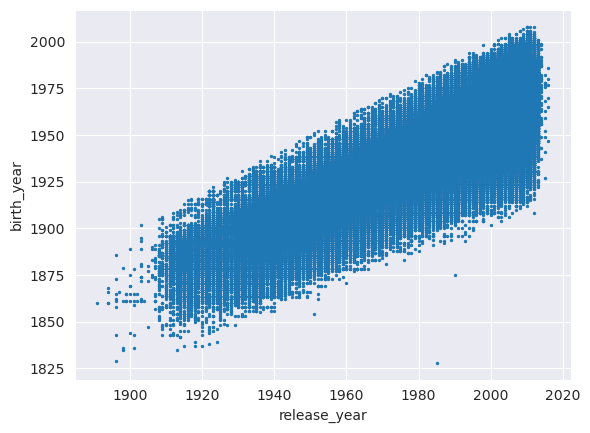

In [36]:
characters.plot.scatter(x='release_year', y='birth_year', s=2)

I see a guy born in 1790 that played in a movie released in 1930. Seems strange, lets check this out. There were 17 actors, but only Jeanne Calment is legit


In [37]:
characters.loc[characters.release_year - characters.birth_year > 100]

,movie_wiki_id,movie_freebase_id,release_date,character_name,birth,gender,height,ethnicity,actor_name,actor_age,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id,release_year,birth_year
312991,13328446.0,/m/03c1w55,1990-12-13,NaN,1875-02-21 00:00:00+00:00,F,NaN,NaN,Jeanne Calment,NaN,/m/0bb16t6,NaN,/m/01w41n,1990.0,1875.0
327317,23718902.0,/m/06zrjvf,1985-01-01,NaN,1828-09-09 00:00:00+00:00,M,NaN,/m/0g6ff,Leo Tolstoy,NaN,/m/0n291dr,NaN,/m/01tz6vs,1985.0,1828.0
407572,34362803.0,/m/0h_chfy,2012-03-06,NaN,1908-05-30 00:00:00+00:00,M,NaN,/m/041rx,Mel Blanc,103.0,/m/0mzkr96,NaN,/m/0c5vh,2012.0,1908.0


For the first one, the actor's data is actually correct. It's the movie release date that is false! It was released the 1981-12-25. It's easier to fix that error before doing the date parsing.
It s the same for many of them, some have unknown actor's date, and Jeanne Calment is actually very, very old.
A Simple Death, written by Leo Tolstoy, does not have Leo Tolstoy as an actor. He was already dead.
Mel Blanc, the original voice of Buggs Bunny, did not give his voice to the 2012 movie.


In [38]:
characters = characters.drop(index=327317)
characters = characters.drop(index=407572)

Let's look at that scatter plot again:

<AxesSubplot:xlabel='release_year', ylabel='birth_year'>

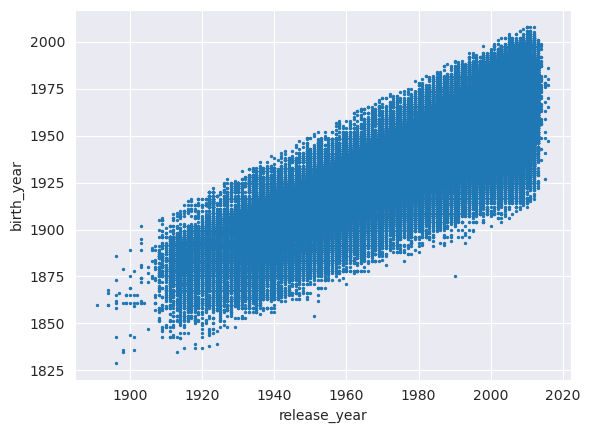

In [39]:
characters.plot.scatter(x='release_year', y='birth_year', s=2)

Lets save all this

In [40]:
import pickle
pickle.dump( movies, open(pickle_folder + "movies.p", "wb" ) )
pickle.dump( characters, open(pickle_folder + "characters.p", "wb" ) )